<a href="https://colab.research.google.com/github/XiaoLiang28/Datamanagement/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [4]:
#---------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

# First API Dataset

In [6]:
start = datetime.datetime (2010, 1, 1)
end = datetime.datetime (2021, 1, 1)

Bachelor = pdr.DataReader('HC01ESTVC1734007', 'fred', start, end)
Bachelor

,HC01ESTVC1734007
DATE,
2010-01-01,27.9
2011-01-01,28.2
2012-01-01,28.7
2013-01-01,29.1
2014-01-01,29.7
2015-01-01,30.2
2016-01-01,30.6
2017-01-01,31.1
2018-01-01,31.8


In [11]:
start = datetime.datetime (2010, 1, 1)
end = datetime.datetime (2021, 1, 1)

Degree = pdr.DataReader(['HC01ESTVC1734007', 'HC01ESTVC1634007'],
                    'fred', start, end)
Degree=Degree.rename(columns={"HC01ESTVC1734007": "Rate of Bachelor", "HC01ESTVC1634007": "Rate of High School"}) # Bachelor's Degree or Higher (5-year estimate) in Camden County, NJ
                                                            # High School Graduate or Higher (5-year estimate) in Camden County, NJ
                                                            # 2010-2021


<Axes: xlabel='DATE'>

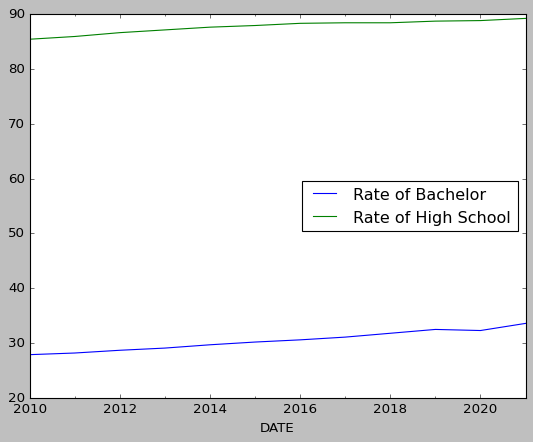

In [12]:
Degree.plot()

In [41]:
start = datetime.datetime (2010, 1, 1)
end = datetime.datetime (2021, 1, 1)

Bachelor_Degree = pdr.DataReader(['HC01ESTVC1734009', 'HC01ESTVC1734011','HC01ESTVC1734025','HC01ESTVC1734007',
                        'HC01ESTVC1734021','HC01ESTVC1734019','HC01ESTVC1734023','HC01ESTVC1734031',
                  'HC01ESTVC1734029','HC01ESTVC1734003','HC01ESTVC1734005','HC01ESTVC1734015','HC01ESTVC1734017',
                  'HC01ESTVC1734027','HC01ESTVC1734001','HC01ESTVC1734013','HC01ESTVC1734033',
                  'HC01ESTVC1734035','HC01ESTVC1734037','HC01ESTVC1734039','HC01ESTVC1734041'                ],
                    'fred', start, end)
Bachelor_Degree=Bachelor_Degree.rename(columns={"HC01ESTVC1734009":"Cape May",
                            "HC01ESTVC1734011":"Cumberland",
                            "HC01ESTVC1734025":"Monmouth",
                            "HC01ESTVC1734007":"Camden",
                            "HC01ESTVC1734021":"Mercer",
                            "HC01ESTVC1734019":"Hunterdon",
                            "HC01ESTVC1734023":"Middlesex",
                            "HC01ESTVC1734031":"Passaic",
                            "HC01ESTVC1734029":"Ocean",
                            "HC01ESTVC1734003":"Bergen",
                            "HC01ESTVC1734005":"Burlington",
                            "HC01ESTVC1734015":"Gloucester",
                            "HC01ESTVC1734017":"Hudson",
                            "HC01ESTVC1734027":"Morris",
                            "HC01ESTVC1734001":"Atlantic",
                            "HC01ESTVC1734013":"Essex",
                            "HC01ESTVC1734033":"Salem",
                            "HC01ESTVC1734035":"Somerset",
                            "HC01ESTVC1734037":"Sussex",
                            "HC01ESTVC1734039":"Union",
                            })


In [43]:
Bachelor_Degree=Bachelor_Degree.rename(columns={"HC01ESTVC1734041":"Warren"})

<Axes: xlabel='DATE'>

<Figure size 800x960 with 0 Axes>

Text(0.5, 1.0, 'Residents with Bachelor or Higher Degree in NJ By County, 2010-2021')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Rate')

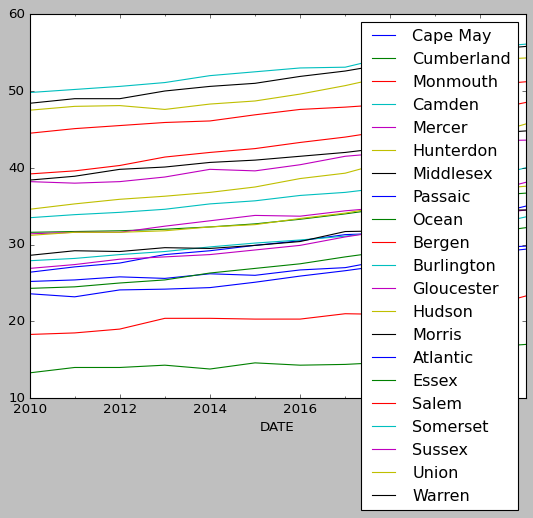

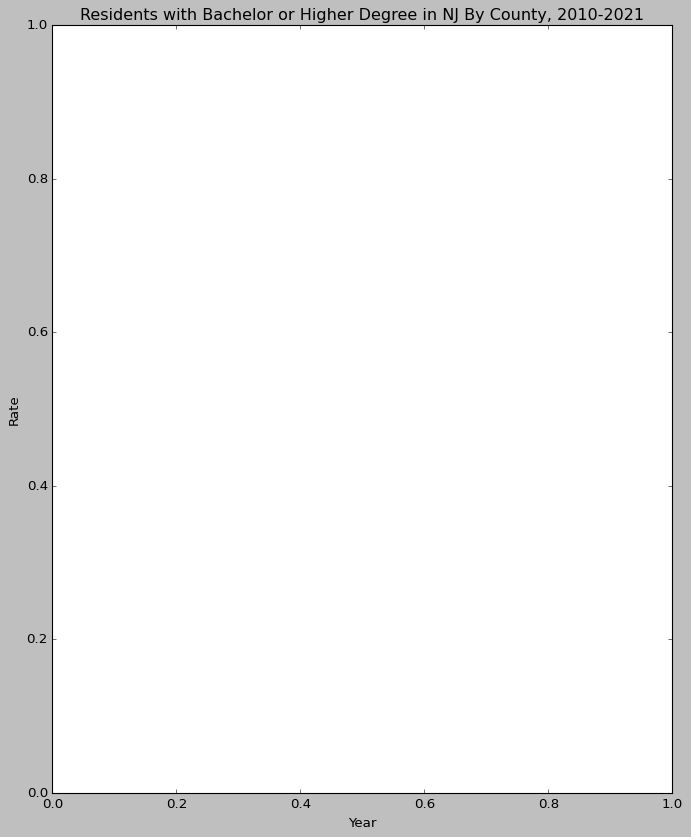

In [47]:
Bachelor_Degree.plot()
plt.figure(figsize=(10, 12))
plt.title('Residents with Bachelor or Higher Degree in NJ By County, 2010-2021')
plt.xlabel('Year')
plt.ylabel('Rate')

# Second API Dataset

In [16]:
pip install wbgapi

In [17]:
import wbgapi as wb

In [18]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-10-26
3,Worldwide Governance Indicators,WGI,3,2023-09-29
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2023-10-12
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-10-30
15,Global Economic Monitor,GEM,3,2023-07-21


In [19]:
wb.economy.coder(['United States', 'South Korea', 'Japan', 'China'])

ORIGINAL NAME,WBG NAME,ISO_CODE
United States,United States,USA
South Korea,"Korea, Rep.",KOR
Japan,Japan,JPN
China,China,CHN


In [20]:
wb.economy.info(['USA', 'KOR', 'JPN','CHN']) # China belongs to upper-middle income countries. Other three countries belong to High income
                        # countries. How to divide: https://blogs.worldbank.org/opendata/new-world-bank-country-classifications-income-level-2022-2023

id,value,region,incomeLevel
CHN,China,EAS,UMC
JPN,Japan,EAS,HIC
KOR,"Korea, Rep.",EAS,HIC
USA,United States,NAC,HIC
,4 elements,,


In [21]:
wb.data.DataFrame('SP.POP.TOTL', wb.region.members('EAS'), range(2010, 2020))

,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
economy,,,,,,,,,,
ASM,5.484900e+04,5.431000e+04,5.369100e+04,5.299500e+04,5.221700e+04,5.136800e+04,5.044800e+04,4.946300e+04,4.842400e+04,4.732100e+04
AUS,2.203175e+07,2.234002e+07,2.273346e+07,2.312813e+07,2.347569e+07,2.381600e+07,2.419091e+07,2.459420e+07,2.496664e+07,2.534022e+07
BRN,3.960530e+05,4.015060e+05,4.066340e+05,4.117020e+05,4.166560e+05,4.214370e+05,4.259940e+05,4.302760e+05,4.342740e+05,4.380480e+05
CHN,1.337705e+09,1.345035e+09,1.354190e+09,1.363240e+09,1.371860e+09,1.379860e+09,1.387790e+09,1.396215e+09,1.402760e+09,1.407745e+09
FJI,9.051690e+05,9.083550e+05,9.110590e+05,9.134530e+05,9.155600e+05,9.172000e+05,9.183710e+05,9.190190e+05,9.189960e+05,9.184650e+05
FSM,1.075880e+05,1.078870e+05,1.082320e+05,1.086090e+05,1.090240e+05,1.094620e+05,1.099250e+05,1.104300e+05,1.109290e+05,1.113790e+05
GUM,1.649050e+05,1.656490e+05,1.663920e+05,1.670540e+05,1.675430e+05,1.679780e+05,1.683460e+05,1.686060e+05,1.686780e+05,1.686240e+05
HKG,7.024200e+06,7.071600e+06,7.150100e+06,7.178900e+06,7.229500e+06,7.291300e+06,7.336600e+06,7.393200e+06,7.452600e+06,7.507900e+06
IDN,2.440162e+08,2.470997e+08,2.502227e+08,2.532759e+08,2.562298e+08,2.590920e+08,2.618502e+08,2.644989e+08,2.670668e+08,2.695829e+08


In [22]:
wb.data.DataFrame(['SP.POP.TOTL', 'NY.GDP.PCAP.KD'], time=range(2000, 2020), skipBlanks=True, columns='series')

NY.GDP.PCAP.KD  SP.POP.TOTL
economy time                               
ABW     YR2000    29005.933374      89101.0
        YR2001    29693.139915      90691.0
        YR2002    29059.486510      91781.0
        YR2003    29093.578238      92701.0
        YR2004    30931.936500      93540.0
...                        ...          ...
ZWE     YR2015     1410.329173   14154937.0
        YR2016     1393.717010   14452704.0
        YR2017     1421.240769   14751101.0
        YR2018     1462.590279   15052184.0
        YR2019     1342.989586   15354608.0

[5300 rows x 2 columns]

In [23]:
wb.series.metadata.get('EN.ATM.CO2E.KT', economies=['USA', 'CHN'], time=range(2017,2021))

Field,Value
Aggregationmethod,Gap-filled total
Developmentrelevance,"Carbon dioxide (CO2) is naturally occurring gas fixed by photosynthesis into organic matter. A byproduct of fossil fuel combustion and biomass burning, it is also emitted from land use changes and other industrial processes. It is the principal anthropogenic greenhouse gas that affects the Earth's radiative balance. It is the reference gas against which other greenhouse gases are measured, thus having a Global Warming Potential of 1. Burning of carbon-based fuels since the industrial revolution has rapidly increased concentrations of atmospheric carbon dioxide, increasing the rate of global warming and causing anthropogenic climate change. It is also a major source of ocean acidification since it dissolves in water to form carbonic acid. The addition of man-made greenhouse gases to the Atmosphere disturbs the earth's radiative balance. This is leading to an increase in the earth's surface temperature and to related effects on climate, sea level rise and world agriculture. Emissions of CO2 are from burning oil, coal and gas for energy use, burning wood and waste materials, and from industrial processes such as cement production. Emission intensity is the average emission rate of a given pollutant from a given source relative to the intensity of a specific activity. Emission intensities are also used to compare the environmental impact of different fuels or activities. The related terms - emission factor and carbon intensity - are often used interchangeably. The carbon dioxide emissions of a country are only an indicator of one greenhouse gas. For a more complete idea of how a country influences climate change, gases such as methane and nitrous oxide should be taken into account. This is particularly important in agricultural economies. The environmental effects of carbon dioxide are of significant interest. Carbon dioxide (CO2) makes up the largest share of the greenhouse gases contributing to global warming and climate change. Converting all other greenhouse gases (methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), sulphur hexafluoride (SF6)) to carbon dioxide (or CO2) equivalents makes it possible to compare them and to determine their individual and total contributions to global warming. The Kyoto Protocol, an environmental agreement adopted in 1997 by many of the parties to the United Nations Framework Convention on Climate Change (UNFCCC), is working towards curbing CO2 emissions globally."
IndicatorName,CO2 emissions (kt)
License_Type,Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
License_URL,https://creativecommons.org/licenses/by-nc/4.0/
Limitationsandexceptions,This series excludes Land-use Change & Forestry (LUCF). The world data includes international bunker fuel-related emissions and emissions from territories not part of the United Nations Framework Convention on Climate Change (UNFCCC).
Longdefinition,"Carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They include carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring."
Periodicity,Annual
Source,"Climate Watch Historical GHG Emissions (1990-2020). 2023. Washington, DC: World Resources Institute. Available online at: https://www.climatewatchdata.org/ghg-emissions"
Statisticalconceptandmethodology,"Carbon dioxide emissions, largely by-products of energy production and use, account for the largest share of greenhouse gases, which are associated with global warming. Anthropogenic carbon dioxide emissions result primarily from fossil fuel combustion and cement manufacturing. In combustion different fossil fuels release different amounts of carbon dioxide for the same level of energy use: oil releases about 50 percent more carbon dioxide than natural gas, and coal releases about twice as much. Cement manufacturing releases about half a metric ton of carbon dioxi

# Using tools to World Happiness Report

In [24]:
happiness=pd.read_excel("https://github.com/XiaoLiang28/Datamanagement/raw/main/Happiness%202021.xls")

In [32]:
happiness.head()

,Rank,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,...,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,2,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,...,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,3,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,...,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,4,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,...,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,5,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,...,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


In [26]:
!pip install ydata-profiling

In [27]:
!pip uninstall typing_extensions --yes
!pip install typing_extensions==4.7.1  --upgrade

Found existing installation: typing_extensions 4.7.1
Uninstalling typing_extensions-4.7.1:
  Successfully uninstalled typing_extensions-4.7.1
  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.7.1 which is incompatible.


In [28]:
from ydata_profiling import ProfileReport

ImportError: ignored

In [33]:
h1=happiness.head()

In [34]:
h1

,Rank,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,...,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,2,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,...,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,3,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,...,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,4,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,...,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,5,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,...,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


In [35]:
h1_Stack=h1.stack()
h1_Stack

0  Rank                                                       1
   Country                                              Finland
   Regional indicator                            Western Europe
   Ladder score                                          7.8421
   Standard error of ladder score                      0.031646
                                                      ...      
4  Explained by: Healthy life expectancy               0.753425
   Explained by: Freedom to make life choices          0.646585
   Explained by: Generosity                            0.302397
   Explained by: Perceptions of corruption             0.383531
   Dystopia + residual                                 2.797818
Length: 105, dtype: object

In [36]:
h1_Unstack=h1_Stack.unstack()
h1_Unstack

,Rank,Country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,1,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.0,...,-0.09776,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.1242,0.480524,3.253415
1,2,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.95441,72.699753,...,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.68616,0.207615,0.484993,2.868296
2,3,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,...,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.20404,0.413019,2.839148
3,4,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.0,...,0.160274,0.672865,2.430343,1.48219,1.172279,0.772319,0.697701,0.292526,0.16994,2.966945
4,5,Netherlands,Western Europe,7.464,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,...,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


In [38]:
h1Melt = h1.melt(id_vars =['Country', 'Perceptions of corruption'])
h1Melt.sort_values('Perceptions of corruption')

,Country,Perceptions of corruption,variable,value
71,Denmark,0.178838,Explained by: Healthy life expectancy,0.762862
51,Denmark,0.178838,Generosity,0.030109
41,Denmark,0.178838,Healthy life expectancy,72.699753
56,Denmark,0.178838,Ladder score in Dystopia,2.430343
36,Denmark,0.178838,Social support,0.95441
...,...,...,...,...
38,Iceland,0.672865,Social support,0.982938
53,Iceland,0.672865,Generosity,0.160274
43,Iceland,0.672865,Healthy life expectancy,73.0
78,Iceland,0.672865,Explained by: Freedom to make life choices,0.697701
